Reading the file

In [1]:
# read the dile
with open("PassagesFromMoonwalkingWithEinstein.txt", "r+") as r:
    data = r.read().strip().split("\n")
    final_data = []
    #remocve the numbering as it is the first two charactes
    for dat in data:
        #remove empty lines
        if len(dat)>0:
            final_data.append(dat[2:])
    r.close()

In [2]:
len(final_data)

5

In [3]:
for dat in final_data:
    print(dat, "\n")

 The average person squanders about forty days a year compensating for things he or she has forgotten. 

 It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse. 

 A trained memory was not just a handy tool, but a fundamental facet of any worldly mind. 

 What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable. 

 In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality. 



POS tagging using nltk

In [4]:
## QUESTION 2.

# Nltk will be used

import nltk
from IPython.display import display
from nltk.tree import Tree

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk import word_tokenize


for sent in final_data:
    tags = nltk.pos_tag(word_tokenize(sent), tagset = "universal")
    print(f"Sentence {sent} tags are :\n\t", tags, "\n\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Sentence  The average person squanders about forty days a year compensating for things he or she has forgotten. tags are :
	 [('The', 'DET'), ('average', 'ADJ'), ('person', 'NOUN'), ('squanders', 'NOUN'), ('about', 'ADP'), ('forty', 'ADJ'), ('days', 'NOUN'), ('a', 'DET'), ('year', 'NOUN'), ('compensating', 'VERB'), ('for', 'ADP'), ('things', 'NOUN'), ('he', 'PRON'), ('or', 'CONJ'), ('she', 'PRON'), ('has', 'VERB'), ('forgotten', 'VERB'), ('.', '.')] 


Sentence  It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse. tags are :
	 [('It', 'PRON'), ('was', 'VERB'), ('simply', 'ADV'), ('a', 'DET'), ('matter', 'NOUN'), ('of', 'ADP'), ('learning', 'VERB'), ('to', 'PRT'), ('“', 'VERB'), ('think', 'VERB'), ('in', 'ADP'), ('more', 'ADV'), ('memorable', 'ADJ'), ('ways', 'NOUN'), ('”', 'VERB

### Dependency and Consistency Parsing.
- A research done showed stanza from stanfold university as best for getting consistency parsing.  For dependency, spacy remained the best.

- All these are going to be done inline.
- Below is a function that will take a sentence and output the dependency and contigency parsings of the sentence

In [5]:
# install stanza
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# create stanza model for english words
import stanza
doc_model_nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency', download=None)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package  |
---------------------------
| tokenize     | combined |
| pos          | combined |
| constituency | wsj      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


In [7]:
# first import spacy and get spacy model into working
import spacy
nlp = spacy.load("en_core_web_sm")

def dependency_parser(sentence):
    """
    Create Dependency parsers using spacy module.
    It uses displacy module of spacy to print the results on a graph.

    :params :
        sentence which is a string to be analysed
    Model returns None
    """
    parsed_obj = spacy.displacy.render(nlp(sentence), style = "dep", jupyter=True)
    #display parsed object
    display(parsed_obj)
    return None

- Create a Function for consitituency parsing.
- The function accepts a string and uses stanza to parse it to its consituents.
- Stanza module is used here as suggested above

In [8]:
!pip install svgling -q

In [9]:
# function for consistituency parsing
def constituency_parser(sentence):
    """
    Create constituency parsers using spacy module.
    It uses stanza module parse the sentence and create tree then nltk is used to draw a graph.

    :params :
        sentence which is a string to be analysed
    Model returns None
    """
    parsed_cons_tree = doc_model_nlp(sentence).sentences[0].constituency
    #convert it to a tree object and display
    display(Tree.fromstring(parsed_cons_tree.pretty_print()))
    return None


- We then Iterate through the above 5 sentences while passing each sentence to above 2 functions to display these mappings



********** The average person squanders about forty days a year compensating for things he or she has forgotten.************
Consisitituency Parsing Visualization


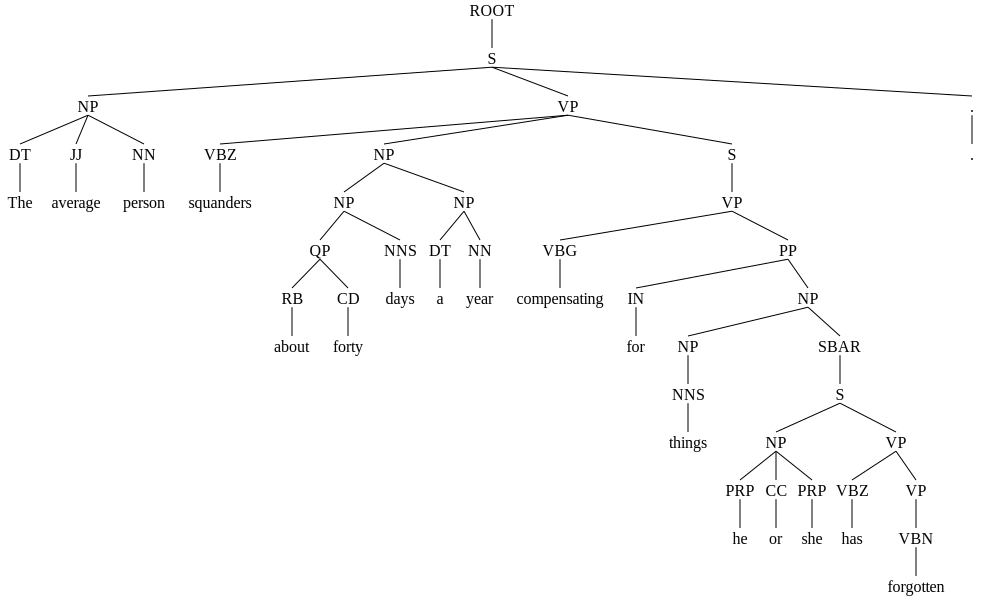

Dependency Parsing Visualization


None




********** It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.************
Consisitituency Parsing Visualization


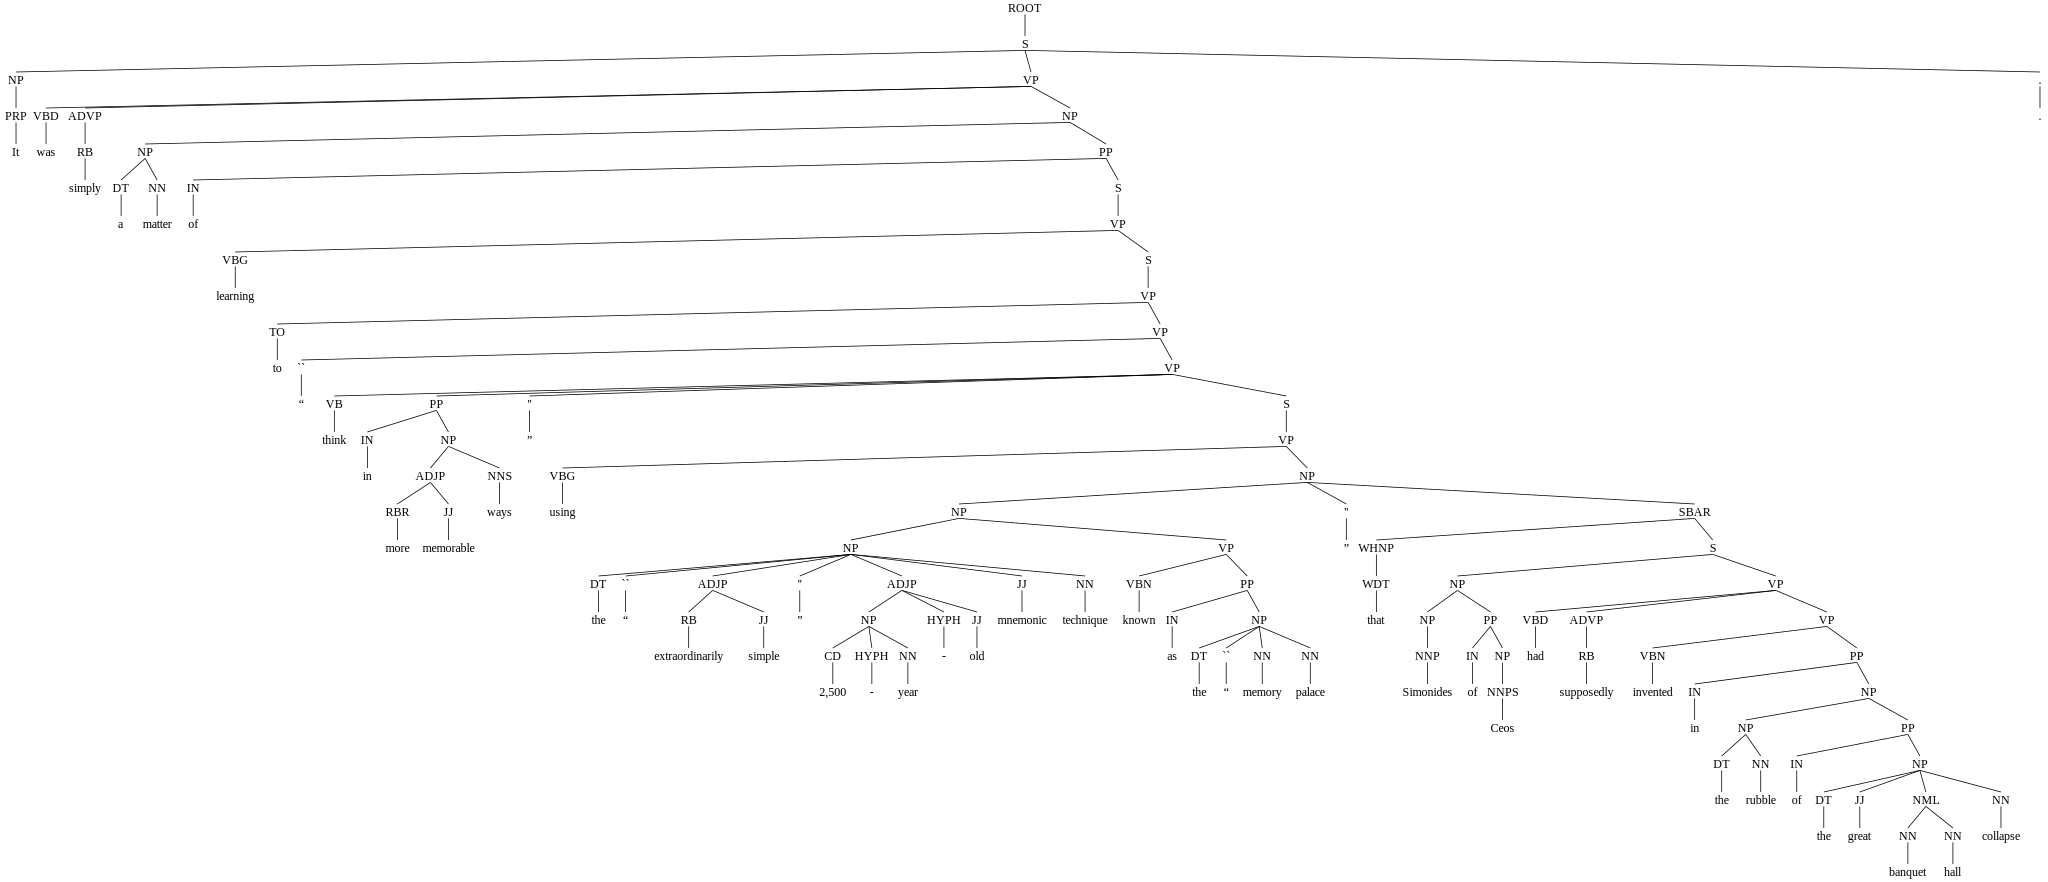

Dependency Parsing Visualization


None




********** A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.************
Consisitituency Parsing Visualization


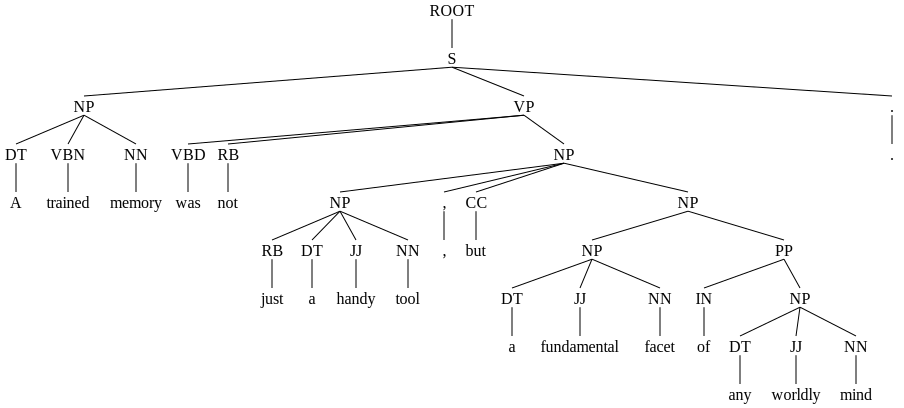

Dependency Parsing Visualization


None




********** What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.************
Consisitituency Parsing Visualization


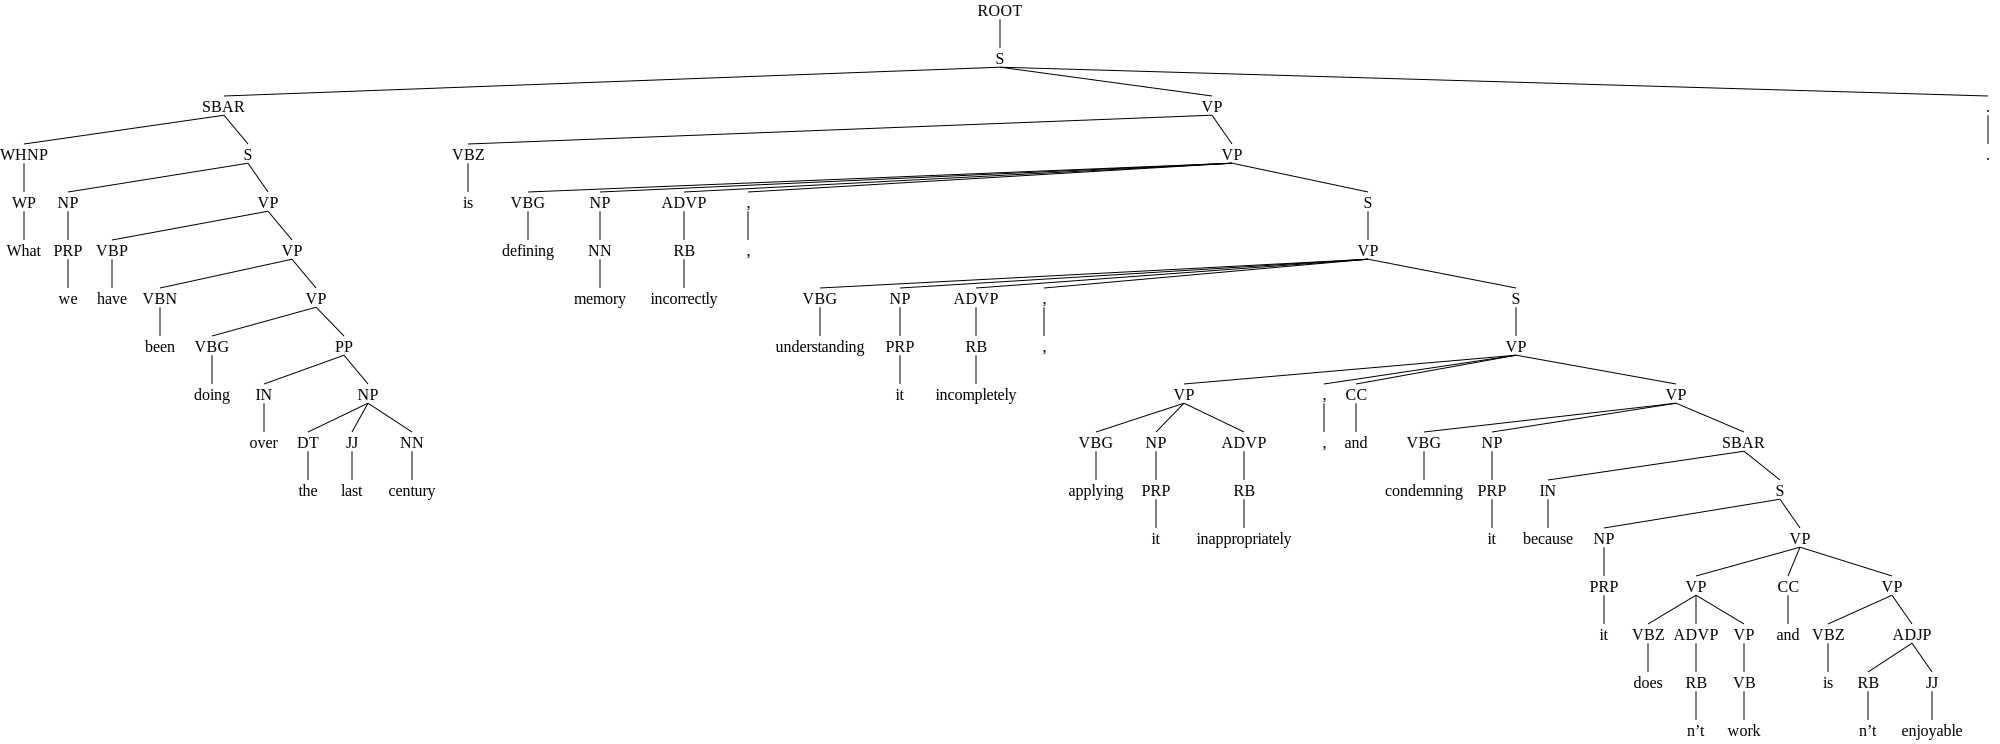

Dependency Parsing Visualization


None




********** In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.************
Consisitituency Parsing Visualization


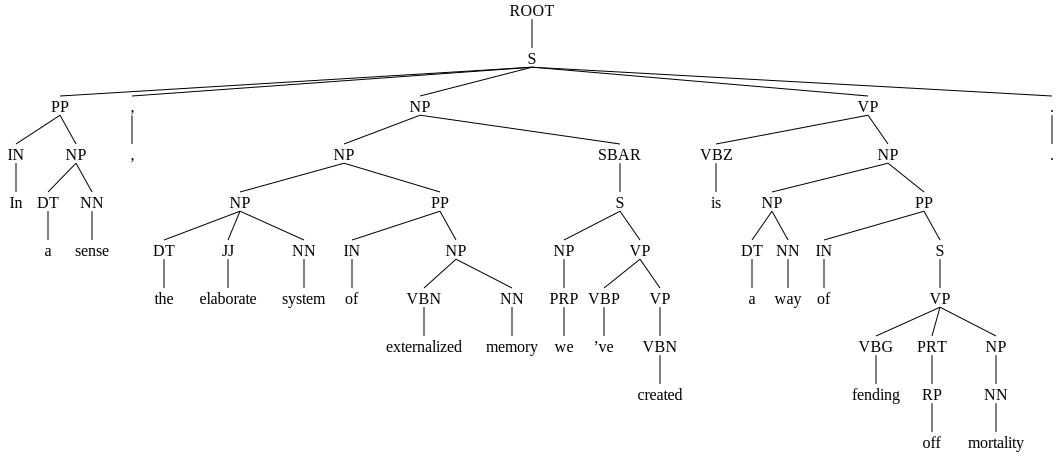

Dependency Parsing Visualization


None

In [10]:
for each_data in final_data:
    print(f"**********{each_data}************")

    print("Consisitituency Parsing Visualization")
    #consistency parsing
    constituency_parser(each_data)
    #dependency parsing
    print("Dependency Parsing Visualization")
    dependency_parser(each_data)
    print("\n\n")